First 5 rows of the dataset:
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


Checking for missing values:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64




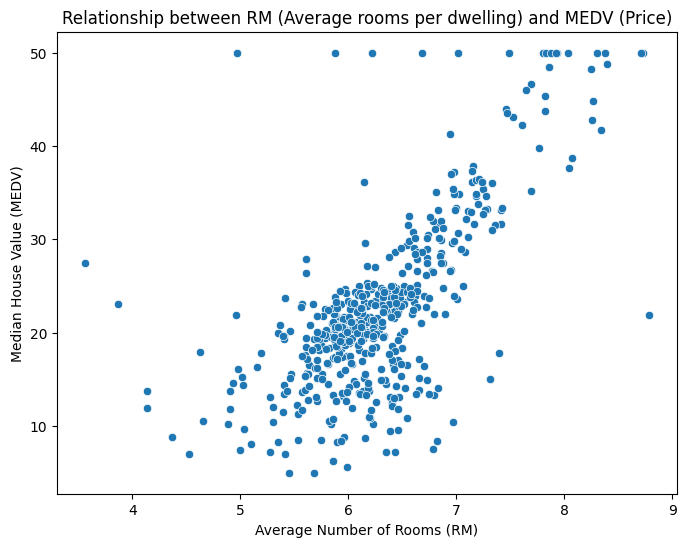

Mean Squared Error (MSE): 20.687720473048557
R-squared Score (R2): 0.7200277678580307


Coefficients for each feature:
    Feature  Coefficient
0      crim    -0.096870
1        zn     0.043937
2     indus     0.040688
3      chas     2.212366
4       nox   -14.508323
5        rm     3.976143
6       age     0.009847
7       dis    -1.354379
8       rad     0.293899
9       tax    -0.012117
10  ptratio    -0.868721
11        b     0.012829
12    lstat    -0.610251


In [2]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 2: Load Boston Housing Dataset from CSV
df = pd.read_csv('BostonHousing.csv')

print("First 5 rows of the dataset:")
print(df.head())
print("\n")

# Step 3: Check for missing values
print("Checking for missing values:")
print(df.isnull().sum())
print("\n")

# Step 3.1: Handle missing values
# OPTION 1: Drop rows with NaN
df = df.dropna()

# (Alternatively you could use df = df.fillna(df.mean()) to fill missing values)

# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['rm'], y=df['medv'])
plt.title('Relationship between RM (Average rooms per dwelling) and MEDV (Price)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median House Value (MEDV)')
plt.show()

# Step 5: Define features and target
X = df.drop('medv', axis=1)  # Features
y = df['medv']               # Target (house prices)

# Step 6: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Create and Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 8: Predict on Test Data
y_pred = model.predict(X_test)

# Step 9: Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared Score (R2): {r2}")
print("\n")

# Step 10: Display Coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("Coefficients for each feature:")
print(coef_df)
